In [3]:
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import random

In [4]:
movies = "Cleaning_up_data/clean_movies.csv"
movies_df = pd.read_csv(movies)
del movies_df['index']
movies_df

,Title,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Directors
0,Inception,2010,8.8,1,0,0,0,Christopher Nolan
1,The Matrix,1999,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski"
2,Avengers: Infinity War,2018,8.5,1,0,0,0,"Anthony Russo,Joe Russo"
3,Back to the Future,1985,8.5,1,0,0,0,Robert Zemeckis
4,"The Good, the Bad and the Ugly",1966,8.8,1,0,1,0,Sergio Leone
...,...,...,...,...,...,...,...,...
15685,Whispers: An Elephant's Tale,2000,5.0,0,0,0,1,Dereck Joubert
15686,The Ghosts of Buxley Hall,1980,6.2,0,0,0,1,Bruce Bilson
15687,The Poof Point,2001,4.7,0,0,0,1,Neal Israel
15688,Sharks of Lost Island,2013,5.7,0,0,0,1,Neil Gelinas


Text(0.5, 0, 'Release Year')

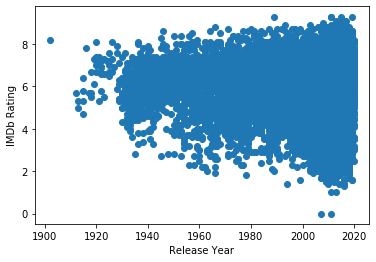

In [5]:
year = movies_df['Year']
rating = movies_df['IMDb']
plt.scatter(year, rating)
plt.ylabel('IMDb Rating')
plt.xlabel('Release Year')

In [6]:
sample_df = movies_df.sample(n=1000)

Text(0.5, 0, 'Release Year')

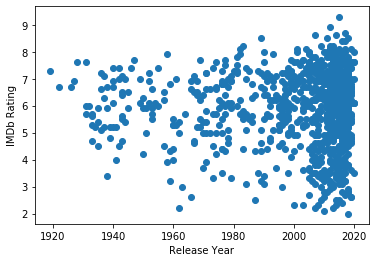

In [7]:
year = sample_df['Year']
rating = sample_df['IMDb']
plt.scatter(year, rating)
plt.ylabel('IMDb Rating')
plt.xlabel('Release Year')

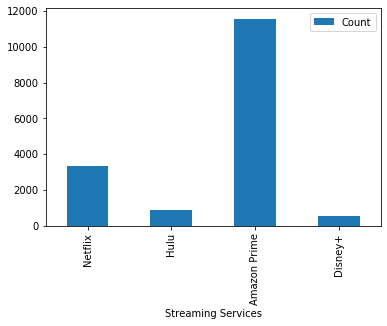

In [8]:
netflix_df = movies_df.loc[movies_df['Netflix'] == 1]
netflix = (len(netflix_df))

hulu_df = movies_df.loc[movies_df['Hulu'] == 1]
hulu = (len(hulu_df))

prime_df = movies_df.loc[movies_df['Prime Video'] == 1]
prime = (len(prime_df))

disney_df = movies_df.loc[movies_df['Disney+'] == 1]
disney = (len(disney_df))

count_df = pd.DataFrame({'Streaming Services': ['Netflix', 'Hulu', 'Amazon Prime', 'Disney+'],
                         'Count': [netflix, hulu, prime, disney]}
                       ).set_index('Streaming Services')
count_df.plot(kind='bar')


<BarContainer object of 9 artists>

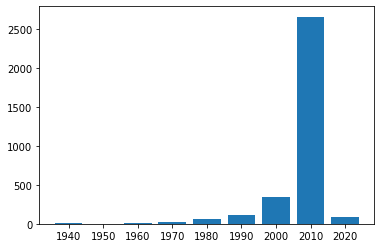

In [9]:
year_bin = [0, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2030]
year_names = ['1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']

netflix_year_df = netflix_df[['Title', 'Year']].reset_index(inplace=False)

netflix_year_df['Decade'] = pd.cut(netflix_year_df['Year'], year_bin, labels=year_names, include_lowest=True)
netflix_bar_df = netflix_year_df.groupby('Decade').count().reset_index(inplace=False)
plt.bar(netflix_bar_df['Decade'],netflix_bar_df['Year'])


<BarContainer object of 11 artists>

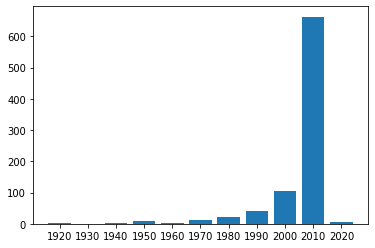

In [10]:
year_bin = [0,1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2030]
year_names = ['1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']

hulu_year_df = hulu_df[['Title', 'Year']].reset_index(inplace=False)

hulu_year_df['Decade'] = pd.cut(hulu_year_df['Year'], year_bin, labels=year_names, include_lowest=True)
hulu_year_df = hulu_year_df.groupby('Decade').count().reset_index(inplace=False)
plt.bar(hulu_year_df['Decade'],hulu_year_df['Year'])


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

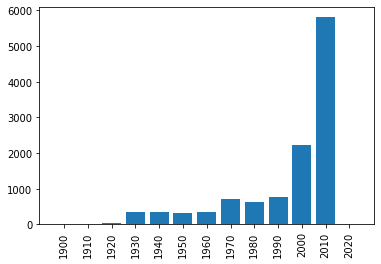

In [11]:
year_bin = [0, 1909, 1919, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2030]
year_names = ['1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']

prime_year_df = prime_df[['Title', 'Year']].reset_index(inplace=False)

prime_year_df['Decade'] = pd.cut(prime_year_df['Year'], year_bin, labels=year_names, include_lowest=True)
prime_year_df = prime_year_df.groupby('Decade').count().reset_index(inplace=False)
plt.bar(prime_year_df['Decade'],prime_year_df['Year'])
plt.xticks(rotation=90)


<BarContainer object of 11 artists>

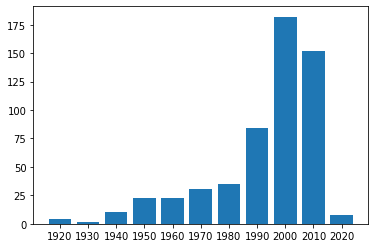

In [12]:
year_bin = [0, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2030]
year_names = ['1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990', '2000', '2010', '2020']

disney_year_df = disney_df[['Title', 'Year']].reset_index(inplace=False)

disney_year_df['Decade'] = pd.cut(disney_year_df['Year'], year_bin, labels=year_names, include_lowest=True)
disney_year_df = disney_year_df.groupby('Decade').count().reset_index(inplace=False)
plt.bar(disney_year_df['Decade'],disney_year_df['Year'])


In [58]:
high_ratings = movies_df.loc[movies_df['IMDb']>8]
director_df = high_ratings['Directors'].value_counts().head(30).reset_index()
# print(director_df)
# for director in director_df[]:
#     top_directors = top_directors.append(high_ratings.loc[(high_ratings['Directors'] == director)])
#     print(director)
top_directors = high_ratings.loc[(high_ratings['Directors'] == 'Steven J. Santos') |
                                (high_ratings['Directors'] == 'Christopher Nolan') |
                                 (high_ratings['Directors'] == 'Hrishikesh Mukherjee') |
                                 (high_ratings['Directors'] == 'Quentin Tarantino') |
                               (high_ratings['Directors'] == 'Martin Scorsese')]


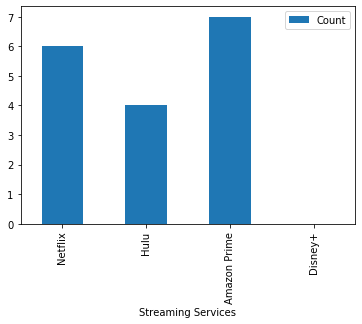

In [55]:
dnetflix_df = top_directors.loc[top_directors['Netflix'] == 1]
dnetflix = (len(dnetflix_df))

dhulu_df = top_directors.loc[top_directors['Hulu'] == 1]
dhulu = (len(dhulu_df))

dprime_df = top_directors.loc[top_directors['Prime Video'] == 1]
dprime = (len(dprime_df))

ddisney_df = top_directors.loc[top_directors['Disney+'] == 1]
ddisney = (len(ddisney_df))

dcount_df = pd.DataFrame({'Streaming Services': ['Netflix', 'Hulu', 'Amazon Prime', 'Disney+'],
                         'Count': [dnetflix, dhulu, dprime, ddisney]}
                       ).set_index('Streaming Services')
dcount_df.plot(kind='bar')

Text(0.5, 0, 'Release Year')

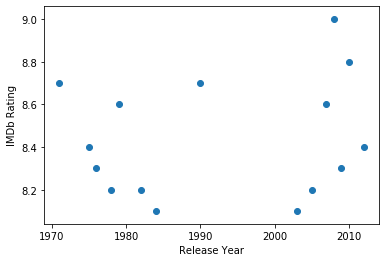

In [56]:
dyear = top_directors['Year']
drating = top_directors['IMDb']
plt.scatter(dyear, drating)
plt.ylabel('IMDb Rating')
plt.xlabel('Release Year')